In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

In [22]:
df1=pd.read_csv('champ_stats2.csv').drop(columns='Unnamed: 0')
df2=pd.read_csv('champs_stat.csv').drop(columns='Unnamed: 0')
df2.rename(columns = {'Champions':'Name'}, inplace = True)
df=pd.merge(df1, df2, on='Name')
df = df.replace({'%':''}, regex=True)
df['Win %'], df['Role %'], df['Ban %'],df['AS+'],df['Pick %']=df['Win %'].astype(float), df['Role %'].astype(float), df['Ban %'].astype(float),df['AS+'] .astype(float), df['Pick %'].astype(float)
dfr=df.copy()
df=pd.get_dummies(data=df, columns=['Role', 'Tier'])
df=df.fillna(0)

0          TOP
1          MID
2          MID
3          TOP
4          MID
        ...   
231    SUPPORT
232        MID
233        MID
234    SUPPORT
235    SUPPORT
Name: Role, Length: 236, dtype: object

In [ ]:
x=df.drop(columns=['Win %','Name'])
y=df['Win %']
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20)


In [ ]:
from statistics import mean


models = []
models.append(('LR', LinearRegression()))
models.append(('RD',Ridge(alpha=1.0)))
models.append(('DTR',DecisionTreeRegressor(random_state = 0)))
models.append(('RFR',RandomForestRegressor( n_estimators=20,random_state=0)))
models.append(('KNR',KNeighborsRegressor(n_neighbors=3)))
# evaluate each model in turn
results = []
names = []
kf = KFold(n_splits=10)
for name, model in models:

	for train_index, test_index in kf.split(Y_train.to_numpy()):
		xtr=X_train.iloc[train_index]
		ytr=Y_train.iloc[train_index]
		xte=X_train.iloc[test_index]
		yte=Y_train.iloc[test_index]
		model.fit(xtr,ytr)
		yv=model.predict(xte)
		MSE = np.square(np.subtract(yte,yv)).mean() 
	
		RMSE = math.sqrt(MSE)
		results.append(RMSE)
	names.append(name)
		
r=np.array_split(results, 5)		

for i in range(len(r)):
	print('%s: %f ' % (names[i], r[i].mean()))
plt.boxplot(r, labels=names)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

MSE = np.square(np.subtract(Y_validation,predictions)).mean() 
	
RMSE = math.sqrt(MSE)



In [27]:
dfr=pd.concat([X_validation, dfr], axis=1, join="inner")
dfr['Name']=dfr['Name']+dfr['Role']


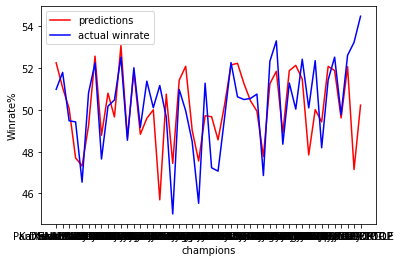

In [42]:
plt.plot(dfr['Name'],predictions,color='red',label='predictions')
plt.plot(dfr['Name'],Y_validation, color='blue',label='actual winrate')
plt.xlabel('champions')
plt.ylabel('Winrate%')
plt.legend()

(45.0, 55.0)

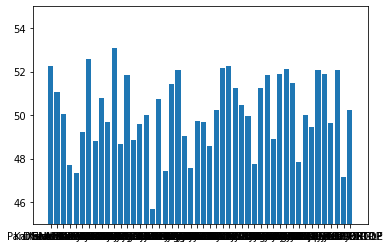

In [40]:
plt.bar(dfr['Name'],predictions)
# plt.bar(dfr['Name'],Y_validation)

plt.ylim(ymax = 55, ymin = 45)

(45.0, 55.0)

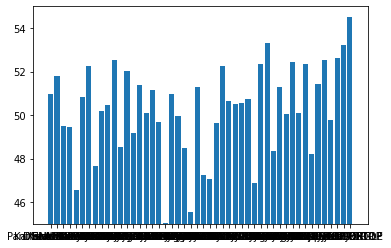

In [38]:
plt.ylim(ymax = 55, ymin = 45)